# Prediction of User Knowledge (maybe find a better title)

# Introduction (add here)
* background
* question
* Identify and describe 


# Preliminary exploratory data analysis

In [159]:
# load the data
library(tidyverse)
library(readxl)

In [207]:
# Clean and wrangle your data into a tidy format
train_data <-  read_excel(path = "data.xls",sheet = 2) %>%  # training data is at sheet 2 
  select(1:6) %>%   
  mutate(UNS = as_factor(UNS)) 
train_data$UNS <- ordered(train_data$UNS, levels = c("very_low", "Low","Middle", "High")) # reorder the level
head(train_data)

New names:
* `` -> ...7
* `` -> ...8



STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle


### Summary Statistics

In [262]:
summary(train_data)
# Number of Missing Data
print("Number of Missing Data")
colSums(is.na(train_data[1:6]))

      STG              SCG              STR              LPR        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.2407   1st Qu.:0.2100   1st Qu.:0.2913   1st Qu.:0.2500  
 Median :0.3270   Median :0.3025   Median :0.4900   Median :0.3300  
 Mean   :0.3711   Mean   :0.3557   Mean   :0.4680   Mean   :0.4327  
 3rd Qu.:0.4950   3rd Qu.:0.4975   3rd Qu.:0.6900   3rd Qu.:0.6475  
 Max.   :0.9900   Max.   :0.9000   Max.   :0.9500   Max.   :0.9900  
      PEG               UNS    
 Min.   :0.0000   very_low:24  
 1st Qu.:0.2500   Low     :83  
 Median :0.5000   Middle  :88  
 Mean   :0.4585   High    :63  
 3rd Qu.:0.6600                
 Max.   :0.9300                

[1] "Number of Missing Data"


STG SCG STR LPR PEG UNS 
  0   0   0   0   0   0

### Boxplot

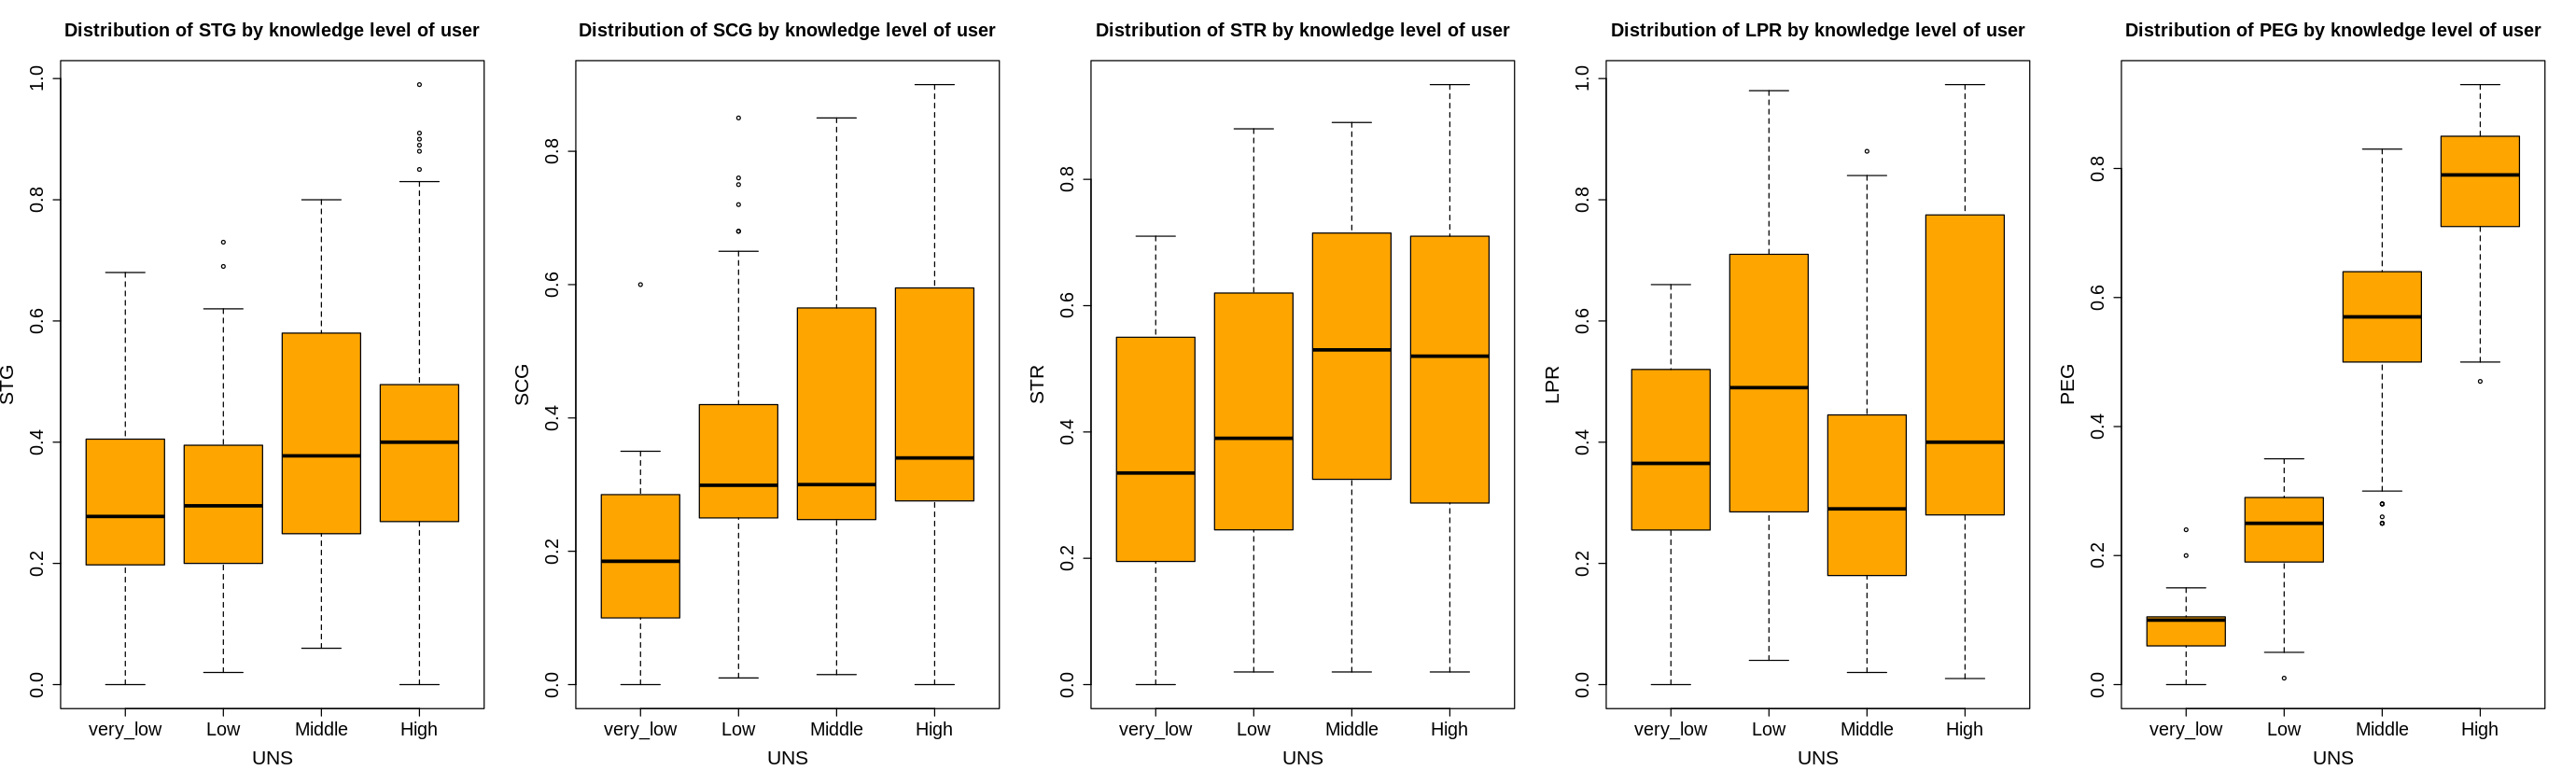

In [260]:
options(repr.plot.width = 23, repr.plot.height = 7) # change the size of plots
varn=names(train_data) 
varn=varn[-6]
nfeature=length(varn)
par(cex.main=1.5) # change the main lab size
par(cex.lab=1.6) # change the x,y lab size
par(cex.axis=1.5) # change the axis size

par(mfrow=c(1,5)) # make all plots a the same row
for (i in 1:nfeature) {  
  boxplot(data=train_data,
          unlist(train_data[, varn[i]]) ~ UNS,
          main= paste("Distribution of", ylab = varn[i],
                      "by knowledge level of user"),
          col="orange",  
          ylab = varn[i])            
}

* add comments add here

### Histogram

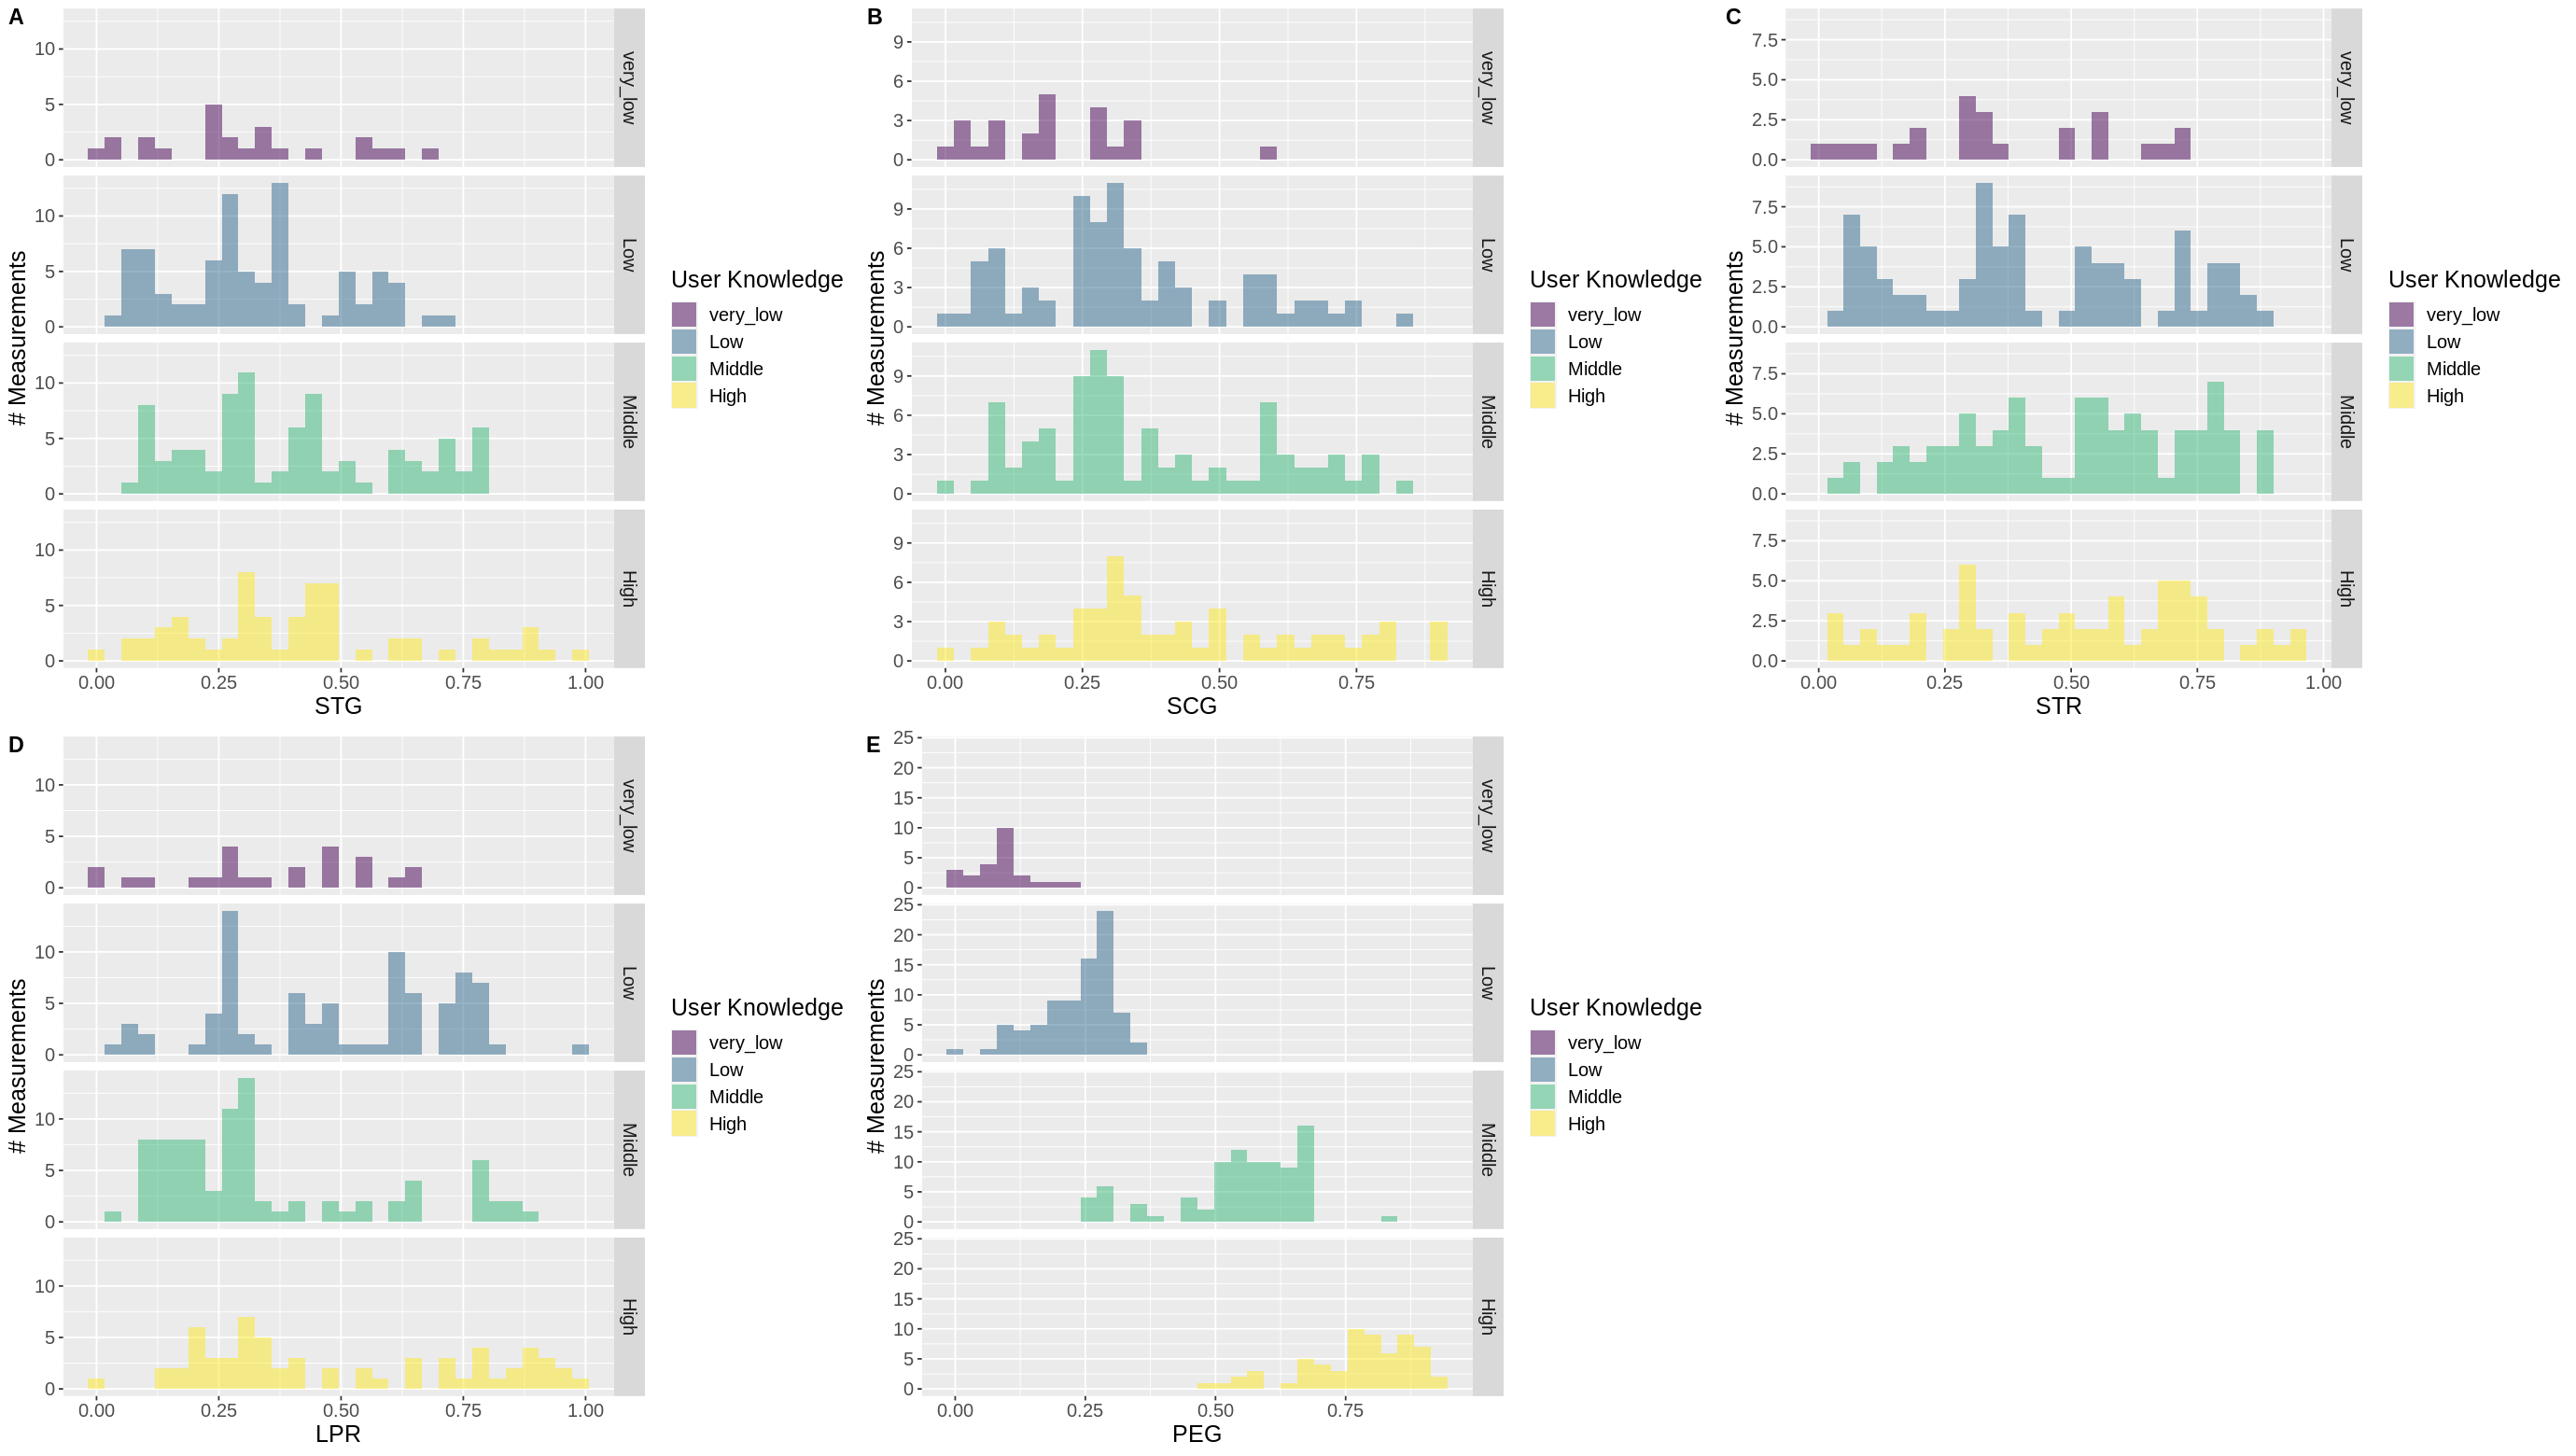

In [336]:
library(cowplot)
options(repr.plot.width = 23, repr.plot.height = 13) # change the size of plots
par(mfrow=c(1,5)) 
plot_list <- c() # create the list of plots
histo_f <- function(i) {  # function to plot the histogram
  p =  (ggplot(train_data, aes(x = unlist(train_data[, varn[i]]), fill = UNS)) +
    geom_histogram(alpha = 0.5, position = "identity",bins=30) +
    facet_grid(rows = vars(UNS)) +
    labs(x = varn[i] , 
        y = "# Measurements", 
        fill = "User Knowledge") +
        theme(text = element_text(size = 15))) 
return(p)
}
for (i in 1:nfeature) 
{plot_list[[i]]=histo_f(i)}
plot_grid(plot_list[[1]],plot_list[[2]],plot_list[[3]],plot_list[[4]],plot_list[[5]] ,labels = "AUTO")

* add comments here

# Methods 
* how you will conduct either your data analysis and which variables/columns you will use
* Describe at least one way that you will visualize the results

# Expected outcomes and significance
* What do you expect to find?
* What impact could such findings have?
* What future questions could this lead to?